CNN 이 Convolutional Neural Network 이고 번역으로는 합성곱 신경망이라고 쓰는데 이름이 참 어렵지 않습니까?

이 이름은 CNN 의 원리를 이해하고 봐야지 납득이 가는 이름인 것 같습니다.

원본 sequential 데이터에 어떤 숫자들을 곱해서 더하는 과정을 convolution 이라고 합니다.  Numpy 에 numpy.convolve 라는 함수가 있는데 같은 동작을 합니다. 

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.convolve.html

일반 신경망과는 다르게 CNN 은 입력 데이터의 내부 값들이 시퀀스에 따른 어떤 관계를 갖고 있을 때 더 뛰어난 성능을 발휘합니다.

2차원 그림 데이터의 경우에는 어떤 물체, 예를 들면 사과가 있을 때 어느 부분에 빨간색 점 데이터들이 군집해 있을 것이고 1차원 배열로 꾸겨넣어도 빨간 점 부분은 1차원 배열에서도 서로 관계를 가질 것 입니다.



이번에도 먼저 MNIST 데이터를 사용해서 CNN 구성해보고 이전에 만들었던 신경망 모델의 결과와 비교를 해보겠습니다.

In [1]:
import keras
from keras import models, layers
from keras import backend
from keras import datasets

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.
/Users/rk/Dev/env/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()
        
        self.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                 input_shape=input_shape))
        self.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
        self.add(layers.MaxPooling2D(pool_size=(2,2)))
        print(self)
        #self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())
        self.add(layers.Dense(128, activation='relu'))
        #self.add(layers.Dropout(0.50))
        self.add(layers.Dense(num_classes, activation='softmax'))
        
        self.comile(loss=keras.losses.categorical_crossentropy,  # loss='categorical_crossentropy'
                    optimizer='adam',
                    metrics=['accuracy']) 


In [3]:
class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
        self.add(layers.Conv2D(64, (3, 3), activation='relu'))
        self.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))

        self.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer='rmsprop',
metrics=['accuracy'])

In [5]:
backend.image_data_format()

'channels_last'

In [6]:
num_classes = 10

def prepare_mnist_data_for_CNN():
    
    (train_X, train_Y), (test_X, test_Y) = datasets.mnist.load_data()
    dataset_size, img_rows, img_cols = train_X.shape
    print(dataset_size)
    
    train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
    test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
    
    train_X = train_X / 255
    test_X = test_X / 255
    
    train_Y = keras.utils.to_categorical(train_Y, num_classes)
    test_Y = keras.utils.to_categorical(test_Y, num_classes)
    
    return (train_X, train_Y), (test_X, test_Y)



In [7]:
def plot_acc(history, title=None):
    if not isinstance(history, dict):
        history = history.history
        
    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Traning data', 'Validation data'], loc=0)
    plt.show()
    
def plot_loss(history, title=None):
    if not isinstance(history, dict):
        history = history.history
        
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Traning data', 'Validation data'], loc=0)
    plt.show()
    
    

In [8]:
def main():
    batch_size   = 128 * 2
    epochs       = 3
    num_classes  = 10
    
    (train_X, train_Y), (test_X, test_Y) = prepare_mnist_data_for_CNN()
    input_shape = train_X.shape[1:]
    print(train_X.shape, test_X.shape)
    print(input_shape)
    
    
    model = CNN(input_shape, num_classes)
    print("After model")
    history = model.fit(train_X, train_Y, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    score   = model.evaluate(test_X, test_Y)
    
    print('Test loss: {:.2f}'.format(score[0]))
    print('Test accuracy: {:.2f}'.format(score[1]))
    
    plot_acc(history)
    plot_loss(history)

11493376/11490434 [==============================] - 10s 1us/step
60000
(60000, 28, 28, 1) (10000, 28, 28, 1)
(28, 28, 1)
After model
Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 95s 2ms/step - loss: 0.3074 - acc: 0.9054 - val_loss: 0.0757 - val_acc: 0.9786
Epoch 2/3
48000/48000 [==============================] - 96s 2ms/step - loss: 0.0943 - acc: 0.9715 - val_loss: 0.0511 - val_acc: 0.9842
Epoch 3/3
10000/10000 [==============================] - 6s 621us/step
Test loss: 0.03
Test accuracy: 0.99


AttributeError: module 'matplotlib.pyplot' has no attribute 'legent'

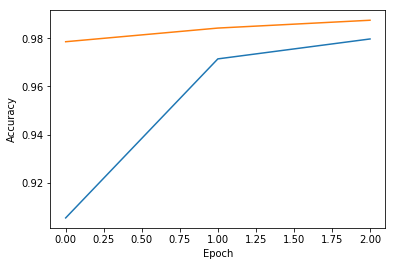

In [9]:
main()